In [52]:
import pandas as pd
import glob
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('paper')
sns.set_style('darkgrid')
%matplotlib inline

In [10]:
def load_bitstamp():
    f = '/home/aahu/Dropbox/black-market-recommender-systems/data/bitstampUSD.csv'
    btp = pd.read_csv(f, header=None, names=['trade_date','trade_price','trade_vol'])
    btp['trade_date'] = pd.to_datetime(btp['trade_date'],unit='s')
    btp = btp[['trade_date', 'trade_price']]
    btp = btp.set_index('trade_date')
    return btp.resample('D', how='mean')

btp = load_bitstamp()

In [11]:
fs = ['/home/aahu/Dropbox/black-market-recommender-systems/data/pandora.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/agora.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/hydra.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/cloudnine.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/silkroad2.tsv',
'/home/aahu/Dropbox/black-market-recommender-systems/data/evolution.tsv']
df = pd.concat([pd.read_csv(f,sep='\t', parse_dates=['scrape_date']) for f in fs])
df.shape

(6119515, 13)

In [69]:
dfev = df = pd.concat([pd.read_csv('/home/aahu/Dropbox/black-market-recommender-systems/data/pandora.tsv',sep='\t', parse_dates=['scrape_date']) for f in fs])

In [73]:
dfev

,category,item,price_usd,scrape_date,ships_from,ships_to,vendor
0,watches,Omega - Constellation Brushed RG [Replica],$219.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
1,watches,Rolex - Submariner Green/Green ETA [AAA+],$275.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
2,watches,Audemars Piguet - Box (AAA Grade Replica),$100.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
3,watches,Rolex - Submariner 2Tone YG/SS Black ETA [AAA+],$299.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
4,watches,Rolex - Yacht-Master Stainless Steel ETA [AAA+],$275.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
5,watches,Hublot - Box Window (AAA Grade Replica),$135.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
6,watches,TAG Heuer - Watch Box (AAA Grade Replica),$100.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
7,watches,Hublot - Big Bang SS Ceramic Set [Ultimate AAA+],$659.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA
8,watches,Video Recorder Waterproof Watch,$38.00 USD,2014-11-01,United States,Worldwide,optiman
9,watches,Hublot - Big Bang All Black Ceramic [Ultimate ...,$679.00 USD,2014-11-01,Hong Kong,Worldwide,RepAAA


In [60]:
df[['listing']].drop_duplicates().shape  #number of distinct listings (note: so many NaN's that this is not reliable. I don't have 'listing' for every market)

(175329, 1)

In [13]:
df[['vendor']].drop_duplicates().shape 

(9757, 1)

In [14]:
#drop everything unrelated to cash flow

In [15]:
df = df[['price', 'price_btc', 'price_usd', 'scrape_date', 'vendor', 'listing', 'ships_from', 'ships_to']]

In [16]:
#SLOW!!!!!! only do it once and then read the tsv.
"""
#df has lots of repetition due to multiple scrapings of the same page
#iterate through the df, use last scrape date for each listing
#this is gross
df = df.sort(columns=['scrape_date'], ascending=False)
group_cols = [c for c in df.columns if c != 'scrape_date']
l = []
seen = set()
for idx,row in df.iterrows():
    rowhash = tuple(row[group_cols].to_dict().values())
    if rowhash not in seen:
        seen.add(rowhash)
        l.append(row.to_dict())
df = pd.DataFrame(l)
print(df['price'].value_counts())
print(df[group_cols].drop_duplicates().shape, df.shape)
df.to_csv('/home/aahu/Desktop/price_df.tsv',sep='\t',index=False)
"""
df = pd.read_csv('/home/aahu/Desktop/price_df.tsv',sep='\t', parse_dates=['scrape_date'])
df.shape

/usr/local/lib/python3.4/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


(2265306, 8)

In [17]:
import re
def price_usd_parse(s):
    if pd.isnull(s):
        return None
    if ('btc' in s.lower()) or ('฿' in s):
        return None
    if ('usd' not in s.lower()) and ('$' not in s):
        return None
    flt = re.findall("\d+\.\d+",s)
    if len(flt) > 0:
        return float(flt[0])
    return None
        
df['price_usd_parsed'] = df['price_usd'].map(price_usd_parse)

In [18]:
def price_btc_parse(s):
    if pd.isnull(s):
        return None
    if ('usd' in s.lower()) or ('$' in s):
        return None
    flt = re.findall("\d+\.\d+",s)
    if len(flt) > 0:
        return float(flt[0])
    return None
                
df['price_btc_parsed'] = df['price_btc'].map(price_btc_parse)    

In [19]:
def is_btc_price(s):
    if pd.isnull(s):
        return False
    if ('btc' in s.lower()) or ('฿' in s):
        return True
    return False

def is_usd_price(s):
    if pd.isnull(s):
        return False
    if ('usd' in s.lower()) or ('$' in s):
        return True
    return False
    
def price_parse(s):
    if pd.isnull(s):
        return None
    if ('usd' in s.lower()) or ('$' in s):
        return price_usd_parse(s)
    if ('btc' in s.lower()) or ('฿' in s):
        return price_btc_parse(s)
    return None

df['price_btc_parsed2'] = df[df['price'].map(is_btc_price)]['price'].map(price_parse)
df['price_usd_parsed2'] = df[df['price'].map(is_usd_price)]['price'].map(price_parse)

In [20]:
t = (np.nan, 10)
def nonnull_else_min(t):
    """eat a tuple, return min of nonnull"""
    nonnulls = [x for x in t if pd.notnull(x)]
    if len(nonnulls) == 0:
        return None
    else:
        r = min(nonnulls)
        if r > 0:
            return r
        else:
            return None
nonnull_else_min(t)

10

In [21]:
#when two prices are listed use the min
df['price_btc_final'] = df[['price_btc_parsed2', 'price_btc_parsed']].apply(nonnull_else_min,axis=1)
df['price_usd_final'] = df[['price_usd_parsed2', 'price_usd_parsed']].apply(nonnull_else_min,axis=1)

In [22]:
dfm = pd.merge(df,btp,left_on='scrape_date',right_index=True)

In [59]:
dfm.shape

(2265306, 16)

In [24]:
dfm['converted_btc'] = dfm[['trade_price','price_btc_final']].apply(lambda x: x[0]*x[1] if pd.notnull(x[1]) else None, axis=1)

In [25]:
dfm['converted_btc'].notnull().value_counts()

True     2102263
False     163043
dtype: int64

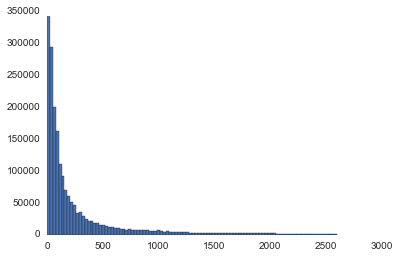

In [26]:
dfm[dfm['converted_btc'] < dfm['converted_btc'].quantile(.95)]['converted_btc'].hist(bins=100)

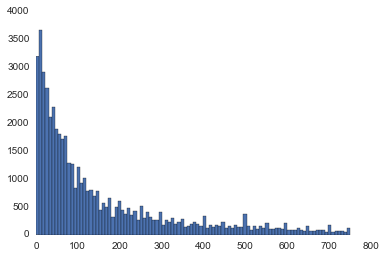

In [27]:
dfm[dfm['price_usd_final'] < dfm['price_usd_final'].quantile(.95)]['price_usd_final'].hist(bins=100)

In [28]:
dfm[dfm['price_usd_final'] < dfm['price_usd_final'].quantile(.95)].shape #['price_usd_final'].hist(bins=100)

(50959, 16)

In [29]:
#select non-outlier prices (ie toss out the top 5% most expensive items)
dfm2 = dfm[dfm['price_usd_final'].notnull()]
dfm2 = dfm2[dfm2['price_usd_final'] < dfm2['price_usd_final'].quantile(0.95)]
dfm3 = dfm[dfm['converted_btc'].notnull()]
dfm3 = dfm3[dfm3['converted_btc'] < dfm3['converted_btc'].quantile(0.95)]
dfm_final = pd.concat((dfm2,dfm3))
dfm_final.shape

(2048105, 16)

In [30]:
dfm_final['price_usd_final'].notnull().value_counts()

False    1997146
True       50959
dtype: int64

In [31]:
dfm_final['converted_btc'].notnull().value_counts()

True     1997146
False      50959
dtype: int64

In [32]:
#total price of goods offered in btc
print(dfm_final['converted_btc'].sum())

#total price of goods offered in usd
print(dfm_final['price_usd_final'].sum())

580977924.571
7942922.59


In [56]:
def plot_keyword_price(df, kw):
    def kw_filt(s,kw):
        s = ''.join([ch for ch in s if ch not in string.ascii_letters])
        return s.startswith('hash')
        #return kw in s.lower().split()
    dfp = df[df['listing'].map(lambda s: kw_filt(s,kw))]
    print(dfp)
    
#plot_keyword_price(dfm_final,'hash')
#sns.set_style('darkgrid')
#dfm_final['converted_btc'].hist(bins=100)
#plt.grid(b=True, which='both')

1227033    NaN
1227034    NaN
1227035    NaN
1227036    NaN
1227037    NaN
1227038    NaN
1227039    NaN
1227040    NaN
1227041    NaN
1227042    NaN
1227043    NaN
1227044    NaN
1227045    NaN
1227046    NaN
1227047    NaN
...
2265288                         MAM-2201 - 10g
2265289                        5F-UR144 - 500g
2265291                          JWH-210 - 10g
2265294                          JWH-210 - 50g
2265295                         5F-PB-22 - 50g
2265296                          EAM-2201 - 5g
2265297    50g - CP 55,940 - synthetic royalty
2265298                       5F-AKB-48 - 250g
2265299                          10g - JWH 073
2265300                        5F-AKB-48 - 50g
2265301                          AM-2201 - 10g
2265302                          50g - JWH 073
2265303                           JWH-210 - 5g
2265304                     Water Bottle Stash
2265305                Snorters Travelling Kit
Name: listing, Length: 2048105, dtype: object

In [40]:
dfm

,listing,price,price_btc,price_usd,scrape_date,ships_from,ships_to,vendor,price_usd_parsed,price_btc_parsed,price_btc_parsed2,price_usd_parsed2,price_btc_final,price_usd_final,trade_price,converted_btc
0,"The Good, the Bad and the Ugly (1966) - $1",NaN,0.00420397,NaN,2015-04-23,Torland,NaN,/vendor/XXiB#,NaN,0.004204,NaN,NaN,0.004204,NaN,234.384671,0.985346
1,100grams Malana hash,NaN,2.17587228,NaN,2015-04-23,India,world,/vendor/tantrikom3#,NaN,2.175872,NaN,NaN,2.175872,NaN,234.384671,509.991108
2,1/8th (3.5g) of fresh Moroccan Pollen / Polm. ...,NaN,0.15960688,NaN,2015-04-23,UK,UK / IRE,/vendor/CQDX#,NaN,0.159607,NaN,NaN,0.159607,NaN,234.384671,37.409406
3,***TWO GRAMS HASHISH***,NaN,0.18024977,NaN,2015-04-23,USA,USA,/vendor/ModernLove#,NaN,0.180250,NaN,NaN,0.180250,NaN,234.384671,42.247783
4,MOROCCAN HASH STANDARD 200 GRAM,NaN,4.71653577,NaN,2015-04-23,Sweden,Europe,/vendor/PsyShop#,NaN,4.716536,NaN,NaN,4.716536,NaN,234.384671,1105.483684
5,"Sample FREE SHIPPING, Hia Haschich (Hya-Hash) ...",NaN,0.06652075,NaN,2015-04-23,Germany,NaN,/vendor/Drugs4you#,NaN,0.066521,NaN,NaN,0.066521,NaN,234.384671,15.591444
6,28g + BUBBLE HASH + Girl Scout Cookies +,NaN,1.50208145,NaN,2015-04-23,USA,USA,/vendor/CaliforniaGreenCross#,NaN,1.502081,NaN,NaN,1.502081,NaN,234.384671,352.064866
7,Atlas Mountain Morrocan Hashish 3.5 grams,NaN,0.24462469,NaN,2015-04-23,UK,UK/EU,/vendor/medsforyou#,NaN,0.244625,NaN,NaN,0.244625,NaN,234.384671,57.336277
8,1g OZ Pollen Hash,NaN,0.17166645,NaN,2015-04-23,Australia,NaN,/vendor/Lord_Of_Weed#,NaN,0.171666,NaN,NaN,0.171666,NaN,234.384671,40.235984
9,10 g Ketama Bubble - Midgrade Dry Sift,NaN,0.34333290,NaN,2015-04-23,EU,NaN,/vendor/Customcandy#,NaN,0.343333,NaN,NaN,0.343333,NaN,234.384671,80.471969
